##### [실습] titanic 승객 데이터 활용

**컬럼 설명** 
역할부여

당신은 10년차 데이터 분석가입니다. 
[DataFrame]에 대해서 설명을 제공할것입니다.
이때, 내가 하는 질문에 대해서 pandas로 어떻게 처리할 수 있는지 알려주세요.

[DataFrame 정보]
데이터셋 자체는 타이타닉을 탄 승객들에 대한 정보들이 담겨있다.
- PassengerId - 승객 고유번호 (index)
- Survived - 생존유무(target 값) (0 = 사망, 1 = 생존)
- Pclass - 티켓 클래스 (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name - 탑승객 성명
- Sex - 성별 (male: 남성, female: 여성)
- Age - 나이(세)
- SibSp - 함께 탑승한 형제자매, 배우자 수 총합
- Parch - 함께 탑승한 부모, 자녀 수 총합
- Ticket - 티켓 넘버
- Fare - 탑승 요금
- Cabin - 객실 넘버
- Embarked - 탑승 항구 (C: Cherbourg, Q: Queenstown, S: Southampton)
[지시사항]
- 
[조건]
1. 코드를 제공할때 이해하기 쉽게 주석을 제공해주세요.
2. 코드는 초보자도 이해하기 쉽게 간결한 스타일로 작성해주세요.
3. 한번에 복사 및 붙여넣기 하기 쉽게 마지막에 정리를 추가해주세요.

1. Pandas로 CSV 파일 여는 코드만 알려줘

2. CSV파일을 읽어올때 index를 지정하는 방법에 대해서 알려줘

In [2]:
# titanic.csv 파일 로드
# titanic 데이터셋의 메타 데이터 확인

import pandas as pd

# PassengerId를 index로한 df
df = pd.read_csv('data/titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 기초문제

In [4]:
# 1. 전체 승객 중 생존자의 수와 사망자의 수를 구하여 출력

# 타이타닉 데이터셋에서 생존자와 사망자 수 출력
survival_counts = df['Survived'].value_counts()
print("사망자 수:", survival_counts[0])
print("생존자 수:", survival_counts[1])

survival_counts

사망자 수: 549
생존자 수: 342


Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
# 2. 승객 나이의 평균 출력

mean_age = df['Age'].mean()
print("승객 나이의 평균: {:.3f}세".format(mean_age))

승객 나이의 평균: 29.699세


In [10]:
# 3. 1등급 승객 중 운임이 가장 높은 승객의 이름 출력

# Pclass가 1인사람들로만 df
first_class = df[df['Pclass'] == 1]

# 그 중 운임(Fare)이 가장 높은 승객 정보 추출
max_fare_passenger = first_class.loc[first_class['Fare'].idxmax()]

max_fare_passenger

# 이름 출력
print("1등급 승객 중 운임이 가장 높은 승객의 이름:", max_fare_passenger['Name'])


1등급 승객 중 운임이 가장 높은 승객의 이름: Ward, Miss. Anna


In [11]:
# 4. 여성 승객의 수를 구하여 출력

# 여성 승객만 필터링
female_passengers = df[df['Sex'] == 'female']

# 여성 승객 수 계산
num_female = len(female_passengers)

# 결과 출력
print("여성 승객의 수:", num_female)

여성 승객의 수: 314


In [14]:
# 5. 운임이 50 이상인 승객의 이름과 운임 출력

# 운임이 50 이상인 승객만 선택
high_fare = df[df['Fare'] >= 50]

# high_fare.head()
# 이름과 운임 컬럼만 출력
high_fare[['Name', 'Fare']]

                                                          Name      Fare
PassengerId                                                             
2            Cumings, Mrs. John Bradley (Florence Briggs Th...   71.2833
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)   53.1000
7                                      McCarthy, Mr. Timothy J   51.8625
28                              Fortune, Mr. Charles Alexander  263.0000
32              Spencer, Mrs. William Augustus (Marie Eugenie)  146.5208
...                                                        ...       ...
857                 Wick, Mrs. George Dennick (Mary Hitchcock)  164.8667
864                          Sage, Miss. Dorothy Edith "Dolly"   69.5500
868                       Roebling, Mr. Washington Augustus II   50.4958
872           Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   52.5542
880              Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)   83.1583

[161 rows x 2 columns]


In [15]:
# 6. 나이가 18세 미만인 승객들의 생존율을 계산하여 출력

# 18세 미만 승객 추출
under_18 = df[df['Age'] < 18]

# 생존율 계산
survival_rate = under_18['Survived'].mean()

# 생존율 출력
survival_rate

np.float64(0.5398230088495575)

# 10세 단위로 생존률 평균을 시각화해줘

In [17]:
!pip install seaborn

<Axes: xlabel='AgeGroup', ylabel='Survived'>

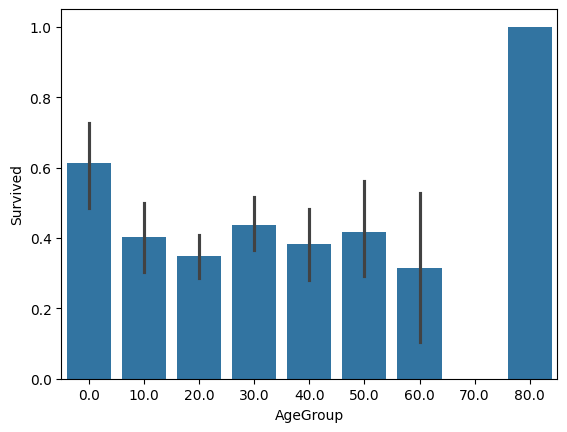

In [18]:
import seaborn as sns

df['AgeGroup'] = (df['Age'] // 10) * 10  # 10세 단위 그룹 생성
sns.barplot(x='AgeGroup', y='Survived', data=df)

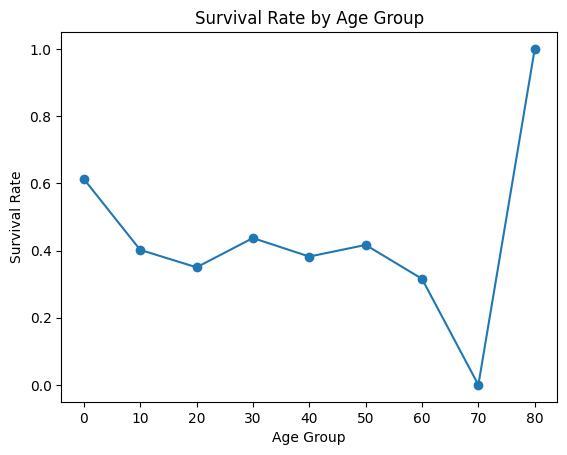

In [19]:
import matplotlib.pyplot as plt

age_survival = df.groupby((df['Age'] // 10) * 10)['Survived'].mean()
plt.plot(age_survival.index, age_survival.values, marker='o')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 '맑은 고딕'
plt.rcParams['axes.unicode_minus'] = False   # 마이너스(-) 기호도 정상 표시

In [20]:
# 7. 2등급 객실에 탑승한 승객의 평균 운임을 계산하여 출력

# 2등급 객실(Pclass=2)에 탑승한 승객만 선택
second_class_passengers = df[df['Pclass'] == 2]

# 평균 운임 계산
mean_fare = second_class_passengers['Fare'].mean()

# 출력
print("2등급 객실 승객의 평균 운임:", mean_fare)

2등급 객실 승객의 평균 운임: 20.662183152173913


각 등급별 객실에 탑승한 승객들의 평균 운임을 시각화

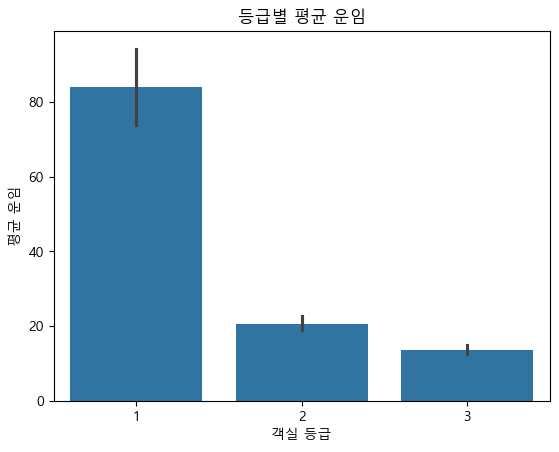

In [23]:
# seaborn barplot은 그룹별 평균을 자동으로 계산해줍니다!
sns.barplot(x='Pclass', y='Fare', data=df)

# 꾸미기(선택)
plt.title('등급별 평균 운임')
plt.xlabel('객실 등급')
plt.ylabel('평균 운임')
plt.show()

In [24]:
# 8. 승객 중 나이가 가장 많은 사람의 나이와 이름을 출력
oldest = df.loc[df['Age'].idxmax()]
print('가장 나이가 많은 승객의 이름:', oldest['Name'])
print('가장 나이가 많은 승객의 나이:', oldest['Age'])

가장 나이가 많은 승객의 이름: Barkworth, Mr. Algernon Henry Wilson
가장 나이가 많은 승객의 나이: 80.0


In [27]:
df[df['Embarked'] == 'S'].shape

(644, 12)

In [25]:
# 9. S 항구에서 탑승한 승객의 수를 출력
# shape
num_s_embarked = df[df['Embarked'] == 'S'].shape[0]

print(f"S 항구에서 탑승한 승객의 수: {num_s_embarked}명")

S 항구에서 탑승한 승객의 수: 644명


In [33]:
# 10. 3등급 객실에 탑승한 남성 승객 중 생존자의 수를 출력

- 고급문제

In [34]:
# 1. 생존자(Survived)와 그렇지 않은 사람들의 `Pclass`(객실 등급)별 평균 나이를 각각 출력

In [35]:
# 2. `SibSp`(형제/배우자 수)가 3 이상인 승객들 중에서, `Fare`(운임) 상위 5명의 이름과 나이를 출력

In [36]:
# 3. 승객 중에서 `Age` 값이 결측치(NaN)인 사람들의 `Embarked`(탑승 항구)별 분포를 출력

In [37]:
# 4. 나이가 16세 미만이고, 혼자 탑승한(`SibSp == 0` and `Parch == 0`) 승객의 이름과 성별, 생존 여부를 출력

In [38]:
# 5. 1등급(Pclass == 1) 객실에 탑승한 승객들 중에서, 운임(Fare)이 평균보다 높은 사람들의 이름과 나이, 운임을 출력

In [39]:
# 6. 나이(Age), 객실 등급(Pclass), 운임(Fare) 값에 결측치가 없는 승객들만 대상으로, 각 등급별 평균 운임과 중앙값 운임을 출력

In [40]:
# 7. 승객들의 `Embarked` 별 평균 나이를 계산하고, 가장 많은 승객이 탑승한 항구를 기준으로 생존율을 계산하여 출력

In [41]:
# 8. 승객 중에서 여성(`Sex == 'female'`)이면서 30세 이상인 사람들의 생존율을 계산하여 출력

In [42]:
# 9. 동반한 형제 또는 배우자 수(`SibSp`)와 부모 또는 자녀 수(`Parch`)의 합이 3 이상인 승객들만을 대상으로, 그들의 생존율을 계산하여 출력

In [43]:
# 10. `Cabin`(객실 번호) 정보가 있는 승객들만을 대상으로, 그들의 생존율을 객실 등급별로 구분하여 계산하여 출력